# Instructions on Running this Slide Deck in Jupyter

I recommend the Anaconda-based approach:

* [Install Anaconda (Python 3.X) from the Continuum.io Website](https://www.anaconda.com/distribution/)
* Enable your Anaconda environment
* Install some other packages:
   * Jupyter: ```conda install jupyter```
   * [Notebook extensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html): ```conda install -c conda-forge jupyter_contrib_nbextensions```
   * [RISE](https://damianavila.github.io/RISE/index.html): ```conda install -c damianavila82 rise```
   * [PyHF](https://github.com/diana-hep/pyhf) for data modeling demonstration:
      * ```conda install pip3```
      * ```pip install pyhf```
* Launch the slides:
   * ```jupyter-notebook <SLIDES.ipynb>```
   * Use "Alt-r" to go to slideshow mode and Spacebar (SHIFT+Spacebar) to go forward (backward) through the slideshow. [More info is available in the RISE documentation](https://damianavila.github.io/RISE/usage.html).


In [1]:
# %load units.py
# Conversion Factors
import math

# distance
_m=1
_km=1000*_m
_cm=_m/100
_mm=_m/1000.
_in=2.54*_cm
_ft=12*_in
_mile=5280*_ft
_miles=_mile
_ly=9460730472580800*_m
_Angstrom=1e-10*_m


# time
_s=1
_ms=_s/1000
_mus=_s/1e6
_min=60*_s
_hour=60*_min
_hours=_hour
_day=24*_hours
_days=_day
_year=365.25*_days
_years=_year
_year_approx=365*_days

# mass
_kg=1
_g=_kg/1000
_lb=_kg/2.2
_oz=(1/16)*_lb
_amu = 1.66053886e-27*_kg

# charge
_C = 1.602e-19 # couloumb

# Force
_N = _kg*_m/_s**2
_dyn = 1e-5*_N

# Energy
_J = _N*_m
_W = _J/_s

_eV = _J*_C
_keV = 1e3*_eV
_MeV = 1e6*_eV
_GeV = 1e9*_eV
_TeV = 1e12*_eV


# Temperature

_K = 1
_Celsius = _K

# Angles
_rad=1
_deg=math.pi/180*_rad

# Constants of nature
_c = 2.998e8 * _m/_s
_h = 6.626e-34 * _kg*_m/_s
_hbar = _h/(2*math.pi)
_G = 6.67408e-11 * _N*_m**2/_kg**2




In [2]:
# %load helpers.py
# Rounding to specific precision, from https://github.com/randlet/to-precision
def to_precision(x,p):
    """
    returns a string representation of x formatted with a precision of p

    Based on the webkit javascript implementation taken from here:
    https://code.google.com/p/webkit-mirror/source/browse/JavaScriptCore/kjs/number_object.cpp
    """


    import math
    x = float(x)

    if x == 0.:
        return "0." + "0"*(p-1)

    out = []

    if x < 0:
        out.append("-")
        x = -x

    e = int(math.log10(x))
    tens = math.pow(10, e - p + 1)
    n = math.floor(x/tens)

    if n < math.pow(10, p - 1):
        e = e -1
        tens = math.pow(10, e - p+1)
        n = math.floor(x / tens)

    if abs((n + 1.) * tens - x) <= abs(n * tens -x):
        n = n + 1

    if n >= math.pow(10,p):
        n = n / 10.
        e = e + 1


    m = "%.*g" % (p, n)

    if e < -2 or e >= p:
        out.append(m[0])
        if p > 1:
            out.append(".")
            out.extend(m[1:p])
        out.append('e')
        if e > 0:
            out.append("+")
        out.append(str(e))
    elif e == (p -1):
        out.append(m)
    elif e >= 0:
        out.append(m[:e+1])
        if e+1 < len(m):
            out.append(".")
            out.extend(m[e+1:])
    else:
        out.append("0.")
        out.extend(["0"]*-(e+1))
        out.append(m)

    return "".join(out)

def latexify_sci(number, template="%.2f \\times 10^{%d}"):
    if type(number) is str:
        number_string = number
    else:
        number_string = "%.6e" % (number)
        pass
    [prefix, power10] = number_string.split("e")

    latex_code = "$" + template % (float(prefix), int(power10)) + "$"
    return latex_code

def printy(number, decimals=2):
    return latexify_sci(to_precision(number,decimals))


In [3]:
%matplotlib inline

# Jet Flavor Tagging - Part 1

## Heavy Quark States and Charged Particle Reconstruction

## Stephen Sekula (SMU)

Presented at the SMU ATLAS Weekly Meeting

June 19, 2019


# Overview

* Jets and Heavy Flavor: Theory Aspects
* Heavy Flavor: Experimental Knowns
* Heavy Flavor Physics and Implications for Experiments
* First Steps: Tracking a Charged Particle


# Jets and Heavy Flavor: Theory Aspects

# ATLAS Detector: A $\mathbf{t \bar{t}}$ Candidate Event

<center>
<img src="Images/run267638_evt193690558_ttbar_cropped.png" style=""/>
</center>
A $t\bar{t}$ event should contain at least 2 bottom-quark-initiated jets. How might we spot such jets?   

# Heavy Flavor: Experimental Knowns

# Properties of Specific Heavy Flavor States

* b-hadrons [[PDG]](https://pdg.lbl.gov)
   * $B^0$ ($\bar{b}d$): mass: $5279.64 \pm 0.13$ MeV ; lifetime: $1.519 \pm 0.004$ ps
   * $B^{+}$ ($\bar{b}u$): mass: $5279.33 \pm 0.13$ MeV ; lifetime: $1.638 \pm 0.004$ ps
   * $\Lambda_b^0$ ($bdu$): mass: $5619.60 \pm 0.17$ MeV ; lifetime: $1.471 \pm 0.009$ ps
   * Commonalities: heavy ($m = [5000,6000]\mathrm{MeV}$) and live about 1-2 ps.



* c-hadrons
   * $D^0$ ($\bar{c}u$): mass: $1864.83 \pm 0.05$ MeV; lifetime: $0.4101 \pm 0.0015$ ps
   * $D^{+}$ ($\bar{c}d$): mass: $1869.65 \pm 0.05$ MeV; lifetime: $1.040 \pm 0.007$ ps
   * Commonalities: moderately heavy ($m \approx 2000\mathrm{MeV}$) and live about 0.5-1 ps


   
Reminder: particle decay is *exponential* in nature, e.g. $P(h \to X|t) = 1- e^{-t/\tau}$; $t$ is the time after production; the lifetime, $\tau$, tells you the time by which there is a $\approx$ {{round((1-1/math.e)*100)}}% probability the particle (in its rest frame) has decayed.

In [4]:
# Particle lifetimes, flight lengths, etc.
import numpy as np
import scipy as sp

m_B0 = 5.27964 # GeV
m_Dp = 1.86965 # GeV
tau_B0 = 1.519e-12 # s
tau_Bp = 1.638e-12 # s
tau_Lb0 = 1.471e-12 # s
tau_D0 = 0.4101e-12 # s
tau_Dp = 1.040e-12 # s

# Average heavy flavor lifetime
tau_b_avg = np.mean([tau_B0, tau_Bp, tau_Bp, tau_Lb0])
tau_c_avg = np.mean([tau_D0, tau_Dp, tau_Dp])

print(f"{tau_b_avg}")
print(f"{tau_c_avg}")

ctau_b_avg = _c * tau_b_avg
ctau_c_avg = _c * tau_c_avg

# example 
p_B0 = 30 # GeV
betagamma_B0 = p_B0/m_B0
print(f"{betagamma_B0}")
bgct_B0 = betagamma_B0 * _c * tau_B0

p_Dp = 30 # GeV
betagamma_Dp = p_Dp/m_Dp
bgct_Dp = betagamma_Dp * _c * tau_Dp

1.5665000000000002e-12
8.300333333333334e-13
5.682205604927609


# Properties of Specific Heavy Flavor States (cont.)

* b-hadrons
   * Commonalities: heavy ($m = [5000,6000]\mathrm{MeV}$) and live about 1-2 ps.
* c-hadrons
   * Commonalities: moderately heavy ($m \approx 2000\mathrm{MeV}$) and live about 0.5-1 ps

* How far will a typical $b$ or $c$ hadron travel?
   * Estimate using $c\tau$
   * For b-hadrons, the $c\tau_b \approx$ {{to_precision(ctau_b_avg/_mm,3)}} mm
   * For c-hadrons, the $c\tau_c \approx$ {{to_precision(ctau_c_avg/_mm,3)}} mm
   * Given the actual energy (E) and momentum (p) of a hadron, scale decay length using $\beta \gamma = (p/E)(E/m) = p/m$: $c\tau \to \beta \gamma c\tau$

   * Example: a $B^0$ meson with $p=30\mathrm{GeV}$ travels {{to_precision(bgct_B0/_mm,2)}} mm, on average, before decaying.


   * Example: a $D^{+}$ meson with $p=30\mathrm{GeV}$ travels {{to_precision(bgct_Dp/_mm,2)}} mm, on average, before decaying.   

In [5]:
# More computations of flight lengths, etc.
m_pi0 = 134.9770*_MeV
m_rho0 = 775.26*_MeV
m_K0s = 497.611*_MeV
tau_pi0 = 8.6e-17*_s
gamma_rho0 = 147.8*_MeV
tau_rho0 = _hbar/gamma_rho0
tau_K0s = 8.954e-11*_s
ctau_pi0 = _c*tau_pi0
ctau_rho0 = _c*tau_rho0
ctau_K0s = _c*tau_K0s

# Compare to Some Light(er) Flavor States

* b-hadrons
   * Commonalities: heavy ($m = [5000,6000]\mathrm{MeV}$) and live about 1-2 ps.
* c-hadrons
   * Commonalities: moderately heavy ($m \approx 2000\mathrm{MeV}$) and live about 0.5-1 ps
* light hadrons
   * $\pi^0$: mass: $135$ MeV; lifetime: $8.6 \times 10^{-5}$ ps $\to$ $c\tau_{\pi^0}=$ {{latexify_sci(ctau_pi0*1000)}} mm
   * $\rho^0$: mass $775$ MeV; lifetime: {{latexify_sci(tau_rho0/1e-12)}} ps $\to$ $c\tau_{\rho^0}=$ {{latexify_sci(ctau_rho0*1000)}} mm
   * $K^0_s$: mass $498$ MeV; lifetime: {{latexify_sci(tau_K0s/1e-12)}} ps $\to$ $c\tau_{K^0_s}=$ {{to_precision(ctau_K0s*1000,2)}} mm

Some light-flavour mesons (e.g. Neutral Kaons) could create the appearance of a long-lived particle inside a jet (because they are long-lived), albeit with less mass per hadron.


# Summary: What to Expect from Hadrons in Jets

* Many hadrons are "long-lived" (e.g. $K_s^0$, $B^0$)
* Jets initiated by light quarks (u,d,s) will *typically* contain hadrons that decay promptly, and are typically low in mass (e.g. $m_{LF} < 1500$ MeV)
* Jets initiated by heavy quarks (c,b) will *typically* contain hadrons that decay after a longer period of time, and are typically heavy in mass (e.g. $m_{HF} > 1500$ MeV)

A strategy for identifying heavy-flavor-initiated jets will, in a brief sketch...
* recognize that jet content will typically be heavier in mass
* will contain "substructure" inside the hadronization/shower evolution that indicates a particle was produced, flew, and decayed some time later
   * as a result of this feature, a particle detector for tracking charged particles will be crucial, as one will want to look for (a) the place where the jet itself originated and (b) the place where longer-lived particles later decay (ideally into charged particles)

# Identifying the trajectory of charged particles

# A Tracking Example: A Cosmic Ray

<img src="Images/JiveXML_246892_4472609.png" style="width: 50%; height: auto; float: right;"/>

A single cosmic-ray muon passes near the center of ATLAS. It's a great way, in a clean environment, to understand how we hope for tracks to look.

We can also see how ATLAS originally deployed an inner tracking system to do this work. The Pixel Detector provides (originally) the inner 4 layers (the Insertable B-Layer, or IBL, was added for Run 2 and is here seen as the closest layer to the beamspot). The Silicon Tracker (SCT) provides the next 4 layers.


# A Tracking Example: A Higher "Pileup" Event

<img src="Images/JiveXML_266904_25884805-YX-RZ-EventInfo-2015-06-04-09-21-33_lowres.jpg" style="width: 50%; height: auto; float: right;"/>

A more realistic representation of recent running conditions. Multiple proton-proton interactions have happened, resulting in many places where particles appear to originate. This is in-time "pileup". There may also be long-lived states that provide track origins displaced from the z-axis.

Can you spot them? ;-)

# A Tracking Example: A Jet with a Long-Lived Subcomponent

<img src="Images/bjet_fig_7.png" style="width: 50%; height: auto; float: right;"/>

Finally, here is an example of an event with a jet candidate. The jet has additionally be determined to contain a long-lived component, consistent with the presence of a b-hadron. Only the Pixel Detector is shown.

Note the displaced secondary "vertex" (blue). This is an old event from Run 1 - the IBL has not yet been installed!

# An Over-Idealized Particle Detector in an Over-Idealized Universe

In [6]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

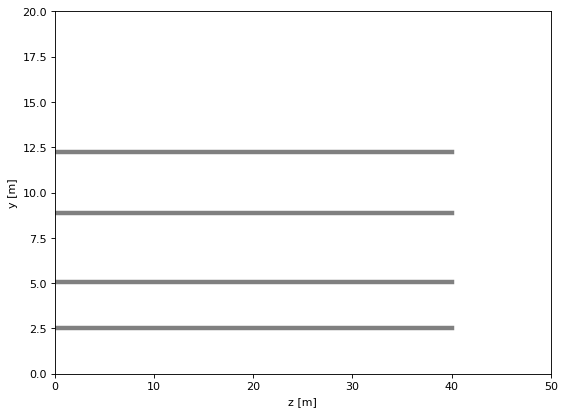

In [7]:
# Drawing plane
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

ax.set_xlim(( 0, 50))
ax.set_ylim((0, 20))
ax.set_xlabel("z [m]")
ax.set_ylabel("y [m]")

# "Detector Planes"
plt.axhline(y=2.5, xmin=0, xmax=0.8, linewidth=4, color = 'gray')
plt.axhline(y=5.05, xmin=0, xmax=0.8, linewidth=4, color = 'gray')
plt.axhline(y=8.85, xmin=0, xmax=0.8, linewidth=4, color = 'gray')
plt.axhline(y=12.25, xmin=0, xmax=0.8, linewidth=4, color = 'gray')

line, = ax.plot([], [], lw=2)

To think basically about tracking, let's boil down the problem. The above illustrates a side-view (y-z plane) of a "ATLAS Pixel-like" detector, consisting of 4 planes (gray lines) that are part of a cylindrical barrel enclosing the z-axis. Each plane is made from sensitive units (e.g. "pixels") that respond to energy deposited by a passing particle. I will ignore the use of a magnetic field to bend particles (for now) merely to isolate the basic tracking questions. All action happens in the plane shown.

Assume each pixel in each plane is 100% efficient with 0% noise.

# An Over-Idealized Particle Detector in an Over-Idealized Universe

In [8]:
# interactive particle simulation
import ipywidgets as widgets
from ipywidgets import Button, Layout
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np
import scipy as sp

class DetectorPlane:
    def __init__(self,x=-1,y=-1, width=-1):
        self.y = y
        self.x = x
        self.width = width

class Pixel:
    def __init__(self, x=-1, y=-1, xwidth=-1):
        self.x = x
        self.y = y
        self.xwidth = xwidth
    
    
# Draw the particle passing through the planes
def particle_line_y(x, slope, intercept):
    return slope*x + intercept

def particle_line_x(y, slope, intercept):
    if slope == 0.0:
        slope = 1e-6
    return (y - intercept)/slope

def GenerateParticle(angle=math.pi/4, intercept=0.0):
    slope = math.tan(angle*math.pi/180)
    particle_x = [-1, 50]
    particle_y = [particle_line_y(-1,slope,intercept),particle_line_y(50,slope,intercept)]
    return [particle_x, particle_y]


def HitChiSquareFitter(detector_planes=[], pixelhits=[]):
    # do a basic chi-square minimization and return the "best fit" particle trajectory hypothesis
    angle_hypo = np.arange(start=5, stop=90, step=1)
    global_chi_square = 1e9
    best_angle = 1e9
    
    for angle in angle_hypo:
        #print(f"Angle Hypothesis: {angle} degrees")
        # get the x coordinates in each plane
        hits_hypo = []
        for plane in detector_planes:
            x_hypo = particle_line_x(plane.y, math.tan(angle*math.pi/180), 0.0)
            y_hypo = plane.y
            hits_hypo.append([x_hypo/plane.width, y_hypo])
        #print(f"  {hits_hypo}")
        # Compute the chi-square of this hypothesis
        chi_square = 0
        #print(pixelhits)
        for hit_hypo in hits_hypo:
            for pixelhit in pixelhits:
                #print(f"      {hit_hypo[1]} vs. {pixelhit.y}")
                if hit_hypo[1] == pixelhit.y:
                    this_chi_square = (hit_hypo[0] - pixelhit.x)**2/pixelhit.xwidth**2
                    #print(f"      {this_chi_square}")
                    chi_square += (hit_hypo[0] - pixelhit.x)**2/pixelhit.xwidth**2
        #print(f"   X^2 = {chi_square}")
        if chi_square < global_chi_square:
            global_chi_square = chi_square
            best_angle = angle
    
    #print(best_angle)
    
    return best_angle
    
    

def DrawPerfectTracker(planes):
    # "Detector Planes"
    for y in planes:
        plt.axhline(y=y, xmin=0, xmax=0.8, linewidth=4, color = 'gray')
    return

def DrawGranularTracker(planes, granularity=10):
    UnitsPerPlane = granularity
    PhysicalPlaneLength = 50 # cm
    RelativePlaneLength = 0.8 # relative to x-axis shown, so 0.8 = 80%
    PixelWidth = RelativePlaneLength/(2*UnitsPerPlane)
    xcenters = np.arange(start=PixelWidth, stop=2*PixelWidth*UnitsPerPlane, step=PixelWidth*2)
    PixelList = [] # [y, center, width] for each pixel
    for y in planes:
        for x in xcenters:
            this_hit = Pixel(x=x, y=y, xwidth=PixelWidth)
            PixelList.append(this_hit)
            #PixelList.append([y, x*PhysicalPlaneLength, PixelWidth*PhysicalPlaneLength])
            plt.axhline(y=y, xmin=x-PixelWidth, xmax=x+PixelWidth, linewidth=4, color = 'gray')
        
    return PixelList

def DrawPerfectEvent(angle=45,showhits=False):
    fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

    ax.set_xlim(( 0, 50))
    ax.set_ylim((0, 20))
    ax.set_xlabel("z [m]")
    ax.set_ylabel("y [m]")

    plane_y_coordinates = [2.5, 5.05, 8.85, 12.25]

    DrawPerfectTracker(plane_y_coordinates)
        
    intercept = 0.0
    the_particle = GenerateParticle(angle=angle, intercept=intercept)
    
    plt.plot(the_particle[0], the_particle[1] ,marker = 'o')
    
    
    # If we are to show hits, draw them too
    if showhits == True:
        for y in plane_y_coordinates:
            slope = math.tan(angle*math.pi/180)
            x_hit = particle_line_x(y, slope, intercept)
            if x_hit > 40:
                continue
            #print([particle_line_x(y, slope, intercept), y])
            plt.plot(x_hit, y, marker='s', markeredgecolor='k', markersize=10, color='r')

           
    line, = ax.plot([], [], lw=2)

def DrawLossyEvent(angle=45, hitefficiency=1.0):
    fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

    ax.set_xlim(( 0, 50))
    ax.set_ylim((0, 20))
    ax.set_xlabel("z [m]")
    ax.set_ylabel("y [m]")

    # "Detector Planes"
    plane_y_coordinates = [2.5, 5.05, 8.85, 12.25]
    DrawPerfectTracker(plane_y_coordinates)
        
    intercept = 0.0
    the_particle = GenerateParticle(angle=angle, intercept=intercept)
    
    plt.plot(the_particle[0], the_particle[1] ,marker = 'o')
    
    # Draw hits, folding in hit efficiency
    for y in plane_y_coordinates:
        slope = math.tan(angle*math.pi/180)
        x_hit = particle_line_x(y, slope, intercept)
        if x_hit > 40:
            continue

        showhit = (np.random.uniform(0,1) < hitefficiency)
        if showhit:
            plt.plot(x_hit, y, marker='s', markeredgecolor='k', markersize=10, color='r')

           
    line, = ax.plot([], [], lw=2)


def DrawGranularEvent(angle=45,showhits=False):
    fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

    ax.set_xlim(( 0, 50))
    ax.set_ylim((0, 20))
    ax.set_xlabel("z [m]")
    ax.set_ylabel("y [m]")

    plane_y_coordinates = [2.5, 5.05, 8.85, 12.25]

    pixel_list = DrawGranularTracker(plane_y_coordinates)
        
    intercept = 0.0
    the_particle = GenerateParticle(angle=angle, intercept=intercept)
    
    plt.plot(the_particle[0], the_particle[1] ,marker = 'o')
    
    
    # If we are to show hits, draw them too
    HitsList = []
    if showhits == True:
        for y in plane_y_coordinates:
            slope = math.tan(angle*math.pi/180)
            x_hit = particle_line_x(y, slope, intercept)
            for pixel in pixel_list:
                if y == pixel.y and ((pixel.x-pixel.xwidth) < x_hit/50 and x_hit/50 < (pixel.x+pixel.xwidth)): 
                    HitsList.append(pixel)
                    plt.axhline(y=pixel.y, 
                                xmin=(pixel.x-pixel.xwidth), 
                                xmax=(pixel.x+pixel.xwidth), 
                                linewidth=4, color = 'r')

           
    line, = ax.plot([], [], lw=2)

    
def DrawGranularLossyEvent(angle=45, 
                           granularity=10, 
                           showhits=False, 
                           hitefficiency=1.0, 
                           showtruth=True, 
                           showfit=False):
    
    fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

    ax.set_xlim(( 0, 50))
    ax.set_ylim((0, 20))
    ax.set_xlabel("z [m]")
    ax.set_ylabel("y [m]")

    plane_y_coordinates = [2.5, 5.05, 8.85, 12.25]
    DetectorPlanes = []
    for plane_y in plane_y_coordinates:
        this_plane = DetectorPlane(x=-1, y=plane_y, width=50)
        DetectorPlanes.append(this_plane)
        

    pixel_list = DrawGranularTracker(plane_y_coordinates, granularity)
        
    intercept = 0.0
    the_particle = GenerateParticle(angle=angle, intercept=intercept)
    
    if showtruth == True:
        plt.plot(the_particle[0], the_particle[1] ,marker = 'o')
    
    
    # If we are to show hits, draw them too
    HitsList = []
    
    for y in plane_y_coordinates:
        slope = math.tan(angle*math.pi/180)
        x_hit = particle_line_x(y, slope, intercept)
        x_hit = particle_line_x(y, slope, intercept)
        for pixel in pixel_list:
            if y == pixel.y and ((pixel.x-pixel.xwidth) < x_hit/50 and x_hit/50 < (pixel.x+pixel.xwidth)): 
                detected_hit = (np.random.uniform(0,1) < hitefficiency)
                if detected_hit:
                    HitsList.append(pixel)

                if showhits and detected_hit:
                    plt.axhline(y=pixel.y, 
                                xmin=(pixel.x-pixel.xwidth), 
                                xmax=(pixel.x+pixel.xwidth), 
                                linewidth=4, color = 'r')
    
    # Best fit to the hits
    angle_hypo = HitChiSquareFitter(detector_planes=DetectorPlanes, pixelhits=HitsList)
    if showfit:
        fitted_track = GenerateParticle(angle=angle_hypo, intercept=intercept)
        plt.plot(fitted_track[0], fitted_track[1], color='g' ,marker = 'o')
  
    
    line, = ax.plot([], [], lw=2)


In [9]:
# This example excludes showing "hits" in the detector
angle_slider = widgets.FloatSlider(min=0.0, max=90, step=2, continuous_update=False)
intercept_slider = widgets.FloatSlider(min=0.0, max=2.5, step=0.01, continuous_update=False)
showhits_button = widgets.ToggleButton(value=False,description='Show Hits?')

input_widgets = widgets.HBox([angle_slider, showhits_button])
#interactive_plot = interactive(DrawPerfectEvent, angle=angle_slider, showhits=)
#output = interactive_plot.children[-1]
#output.layout.height = '450px'
#interactive_plot
interactive_output = widgets.interactive_output(DrawPerfectEvent, 
                                                {'angle': angle_slider, 'showhits': showhits_button})
#output = interactive_output.children[-1]
#output.layout.height = '450px'

display(input_widgets, interactive_output)


Output()

The above program will let you generate a "particle" (blue line) that passes through the layers of the detector. The particle alway arises from the origin of the coordinate system. 

Toggle the "hits" option to see "strikes" on the detector planes at 100% efficiency. This detector is modeled as if infinitely pixellated - real detectors have finite sizes to the pixels, but this is an idealization (we'll complicate this more in a moment).

# A Less-Ideal Tracker

In [10]:
# This example excludes showing "hits" in the detector, with loss of efficiency
angle_slider = widgets.FloatSlider(value=45, min=0.0, max=90, step=2, continuous_update=False)
hitefficiency_slider = widgets.FloatSlider(value=1.0, min=0.0, max=1.0, step=0.01, continuous_update=False)

input_widgets = widgets.HBox([angle_slider, hitefficiency_slider])
interactive_output = widgets.interactive_output(DrawLossyEvent, 
                                                {'angle': angle_slider, 'hitefficiency': hitefficiency_slider},
                                               )
#output = interactive_output.children[-1]
#output.layout.height = '450px'

display(input_widgets, interactive_output)


Output()

In this example, the tracker becomes "lossy" - even if a particle leaves energy in a pixel, that pixel is not guaranteed to yield exactly 1 "hit" as a result. The *efficiency per hit* can be controlled with the above. You can already see at 90-95% per-hit efficiency, you can start noticeably losing hits on tracks.

# A Granular Tracker

In [11]:
# This example is a granular detector, but perfect in efficiency
angle_slider = widgets.FloatSlider(min=0.0, max=90, step=2, continuous_update=False)
intercept_slider = widgets.FloatSlider(min=0.0, max=2.5, step=0.01, continuous_update=False)
showhits_button = widgets.ToggleButton(value=False,description='Show Hits?')

input_widgets = widgets.HBox([angle_slider, showhits_button])
#interactive_plot = interactive(DrawPerfectEvent, angle=angle_slider, showhits=)
#output = interactive_plot.children[-1]
#output.layout.height = '450px'
#interactive_plot
interactive_output = widgets.interactive_output(DrawGranularEvent, 
                                                {'angle': angle_slider, 'showhits': showhits_button})
#output = interactive_output.children[-1]
#output.layout.height = '450px'

display(input_widgets, interactive_output)


Output()

The above illustrates a slightly more realistic tracker (albeit in this case with 100% per-hit efficiency). Now the tracker planes are build from 10 sub-units. A "hit" is now defined by the x-coordinate of the center of a pixel unit and the y-coordinate of its vertical plane. The width of the pixel unit defines the *resolution* on the hit... now we suddenly have a sense of uncertainty in hit tracking and from where it arises.

# A Granular, Lossy Tracker - Some Basic Theory

For the idealized world I have created - a single ionizing particle always emitted from the origin of the coordinate system - we can now consider a *granular, lossy* tracking detector and how one uses the information about which pixels are hit to form an hypothesis about the trajectory of the particle that left the hits.

* Starting all hypothetical trajectories at the origin and assuming a straight line, scan over angle (slope) hypotheses, e.g. $\theta = [5,89]^{\circ}$ in 1-degree steps;
* For each angular (slope) hypothesis, compute the x-coordinate of where that trajector would have intersected each y-plane of the detector system, building up hypotheses for hits: $x_{hypo,i}$ where $i$ runs over layer planes.
* Using all hypothetical hits in layer $i$, compute the $\chi^2_{i}$ with the actual hit in that layer, $$\chi^2_i = \left( \frac{x_{hypo,i} - x_{i}}{\sigma_{i}} \right)^2$$ where $x_{i}$ is the actual center of the pixel hit in layer $i$ and $\sigma_{i}$ is the width of the pixel that was hit.
* Compute the total $\chi^2 = \sum_{i} \chi^2_{i}$ - **the "best fit" will be defined as the hypothesis that achieves the lowest $\chi^2$**


# A Granular, Lossy Tracker - Example

In [12]:
# This example is a granular detector, with per-hit efficiency losses
angle_slider = widgets.FloatSlider(value=45, min=0.0, max=90, step=2, continuous_update=False)
granularity_slider = widgets.FloatSlider(value=10, min=10, max=100, step=5, continuous_update=False)
hitefficiency_slider = widgets.FloatSlider(value=1.0, min=0.0, max=1.0, step=0.01, continuous_update=False)
showhits_button = widgets.ToggleButton(value=False,description='Show Hits?')
showtruth_button = widgets.ToggleButton(value=True,description='Show Truth?')
showfit_button = widgets.ToggleButton(value=False,description='Show Best Fit?')

slider_row = widgets.HBox([angle_slider, hitefficiency_slider, granularity_slider])
button_row = widgets.HBox([showhits_button, showtruth_button, showfit_button])

input_widgets = widgets.VBox([slider_row, button_row])
#interactive_plot = interactive(DrawPerfectEvent, angle=angle_slider, showhits=)
#output = interactive_plot.children[-1]
#output.layout.height = '450px'
#interactive_plot
interactive_output = widgets.interactive_output(DrawGranularLossyEvent, 
                                                {'angle': angle_slider, 
                                                 'granularity': granularity_slider,
                                                 'hitefficiency': hitefficiency_slider, 
                                                 'showhits': showhits_button,
                                                'showtruth': showtruth_button,
                                                'showfit': showfit_button})
#output = interactive_output.children[-1]
#output.layout.height = '450px'

display(input_widgets, interactive_output)


Output()

This example allows control of granularity, per-hit efficiency, and true particle angle. Play around and see the effect of granularity and per-hit efficiency on the ability to resolve the "truth" about the particle's trajectory.

# Closing Thoughts

# Reality - the next steps

* In reality
    * ...each proton-proton collision produces something like dozens, hundreds or thousands of particles somewhere along the $z$ axis
    * ... due to immersion in a solenoidal magnetic field, trajectories are not straight - they are helical, having 5 parameters to describe them, not 2.
    * ... due to the fact that long-lived particles decay *away* from the interaction point, you can't assume that a trajectory begins at the interaction point
    * ... detectors have noise and dead material; particle energy losses are not perfect and uniform; etc.
* This talk highlights the basic ideas needed to even begin to think about the problem:
    * Expect jets to create prompt charged particles and displaced charged particles;
    * Tracking detectors need layering and granularity in the layering to attain sufficient resolution to see these features
    * Tracking algorithms need to be complex and adapt to the varying conditions of the detector and under which the charged particles are produced in the first place

# Learn More

* Andy Salzburg. ["Tracking Challenge"](https://erez.weizmann.ac.il/pls/htmldb/f?p=101:58:::NO:RP:P58_CODE,P58_FILE:5446,Y). Hammers and Nails Workshop. 2017. Weizmann Institute of Science.